In [1]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt

In [60]:
def RK34step(f, told, Yold, h):
    Y1 = f(told, Yold)
    Y2 = f(told + h/2, Yold + h/2*Y1)
    Y3 = f(told + h/2, Yold + h/2*Y2)
    Z3 = f(told + h, Yold - h*Y1 + 2*h*Y2)
    Y4 = f(told + h, Yold + h*Y3)
    Ynew = Yold + h/6*(Y1 + 2*Y2 + 2*Y3 + Y4)

    err = np.abs(h/6*(2*Y2+Z3-2*Y3-Y4))

    return Ynew, err

def newstep (tol, err, errold, hold, k):
    hnew = hold * np.power(tol/err, 2/(3*k))*np.power(tol/errold, -1/(3*k))
    return hnew
    
def adaptiveRK34(f, t0, tf, y0, tol):
    k = 4
    h = (tf-t0)*np.power(tol,1/4)/(100*(1+la.norm(f(t0,y0))))
    t = [t0]
    Y = [y0]
    ERR = [0]
    y, err = RK34step(f, t[-1], y0, h)
    Y.append(y)
    ERR.append(err)
    h = newstep(tol, ERR[-1], tol, h, k)
    t.append(t[-1] + h)

    while t[-1] + h < tf:
        y, err = RK34step(f, t[-1], Y[-1], h)
        Y.append(y)
        ERR.append(err)
        h = newstep(tol, ERR[-1], ERR[-2], h, k)
        t.append(t[-1] + h)

    y, err = RK34step(f, t[-1], Y[-1], tf-t[-1])
    t.append(tf)
    Y.append(y)
    ERR.append(err)
    return t, Y, ERR

    err = np.zeros_like(approx)
    for i in range(len(err)):
        err[i] = np.abs(approx[i] - y0*math.exp(-2*tgrid[i]))
    return err

In [ ]:
def lotka(t,u):
    a = 3
    b = 9
    c = 15
    d = 15
    return a*u(1)-b*u(1)*u(2), c*u(1)*u(2)-d*u(2)

In [ ]:
f = lo

Antal steg:  66


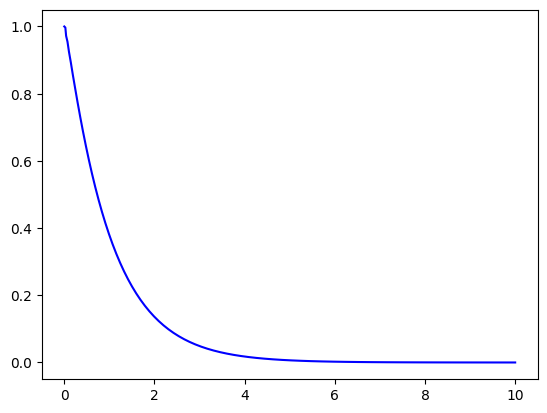

In [62]:
y0 = 1
f = lambda t, y: -1.05*y
t, Y, ERR = adaptiveRK34(f, 0, 10, y0, 1e-6)
plt.plot(t, Y, 'b')
print("Antal steg: ", len(t))


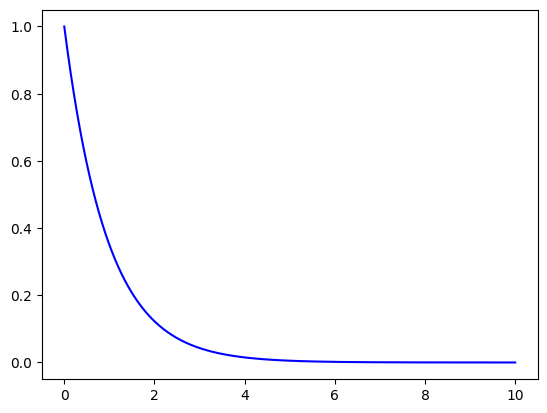

In [48]:
y0 = 1
f = lambda t, y: -1.05*y

tgrid, approx = eulerint(f, y0, 0, 10, 1000)

plt.plot(tgrid, approx, 'b')